# Fit and Predict Credit Information


I am going to fit and predit credit information of a competition, "Home Credit Default Risk" on Kaggle.

In [162]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

### Train Dataset

In [2]:
# get the train dataset

train = pd.read_csv('"Home Credit Default Risk"_application_train.csv')

train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# grasp the contents of the train dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
# check whether each feature value has missing values of the train dataset

n_missing_values = train.isnull().sum().drop("SK_ID_CURR").drop("TARGET")

n_missing_values_table = pd.DataFrame({
    'missing_values': n_missing_values
})

n_missing_values_table

,missing_values
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,12
AMT_GOODS_PRICE,278
NAME_TYPE_SUITE,1292


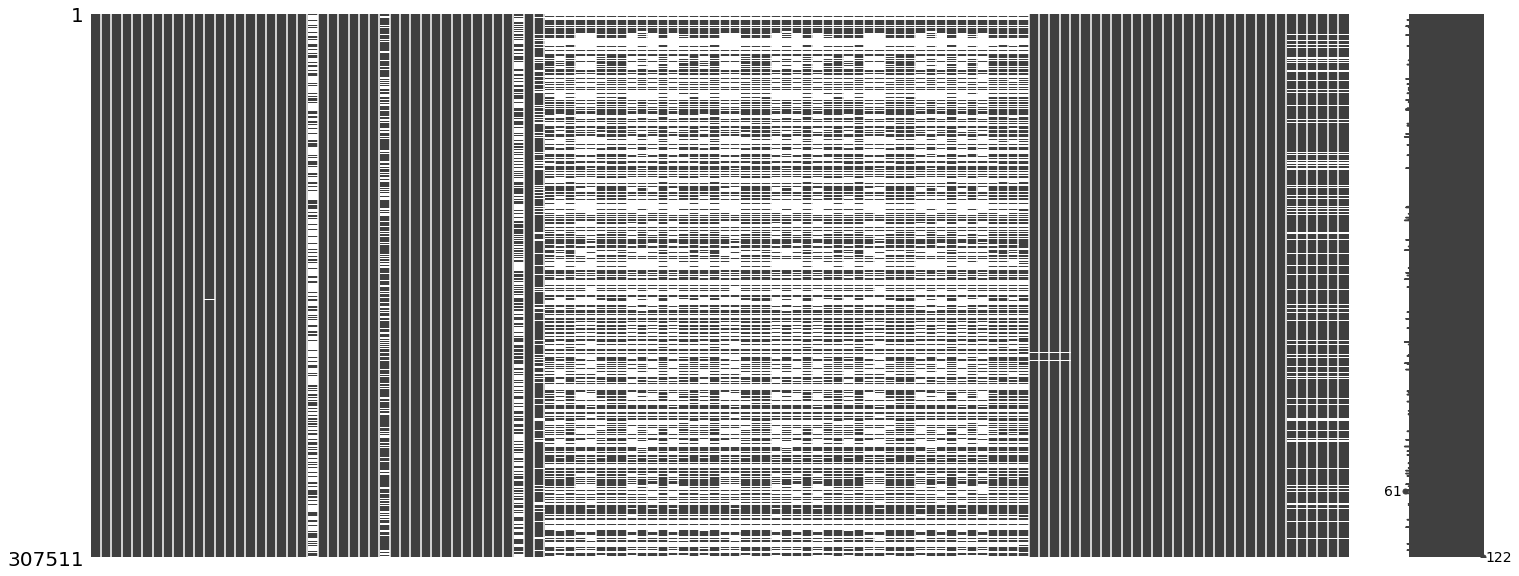

In [6]:
msno.matrix(train)

plt.show()

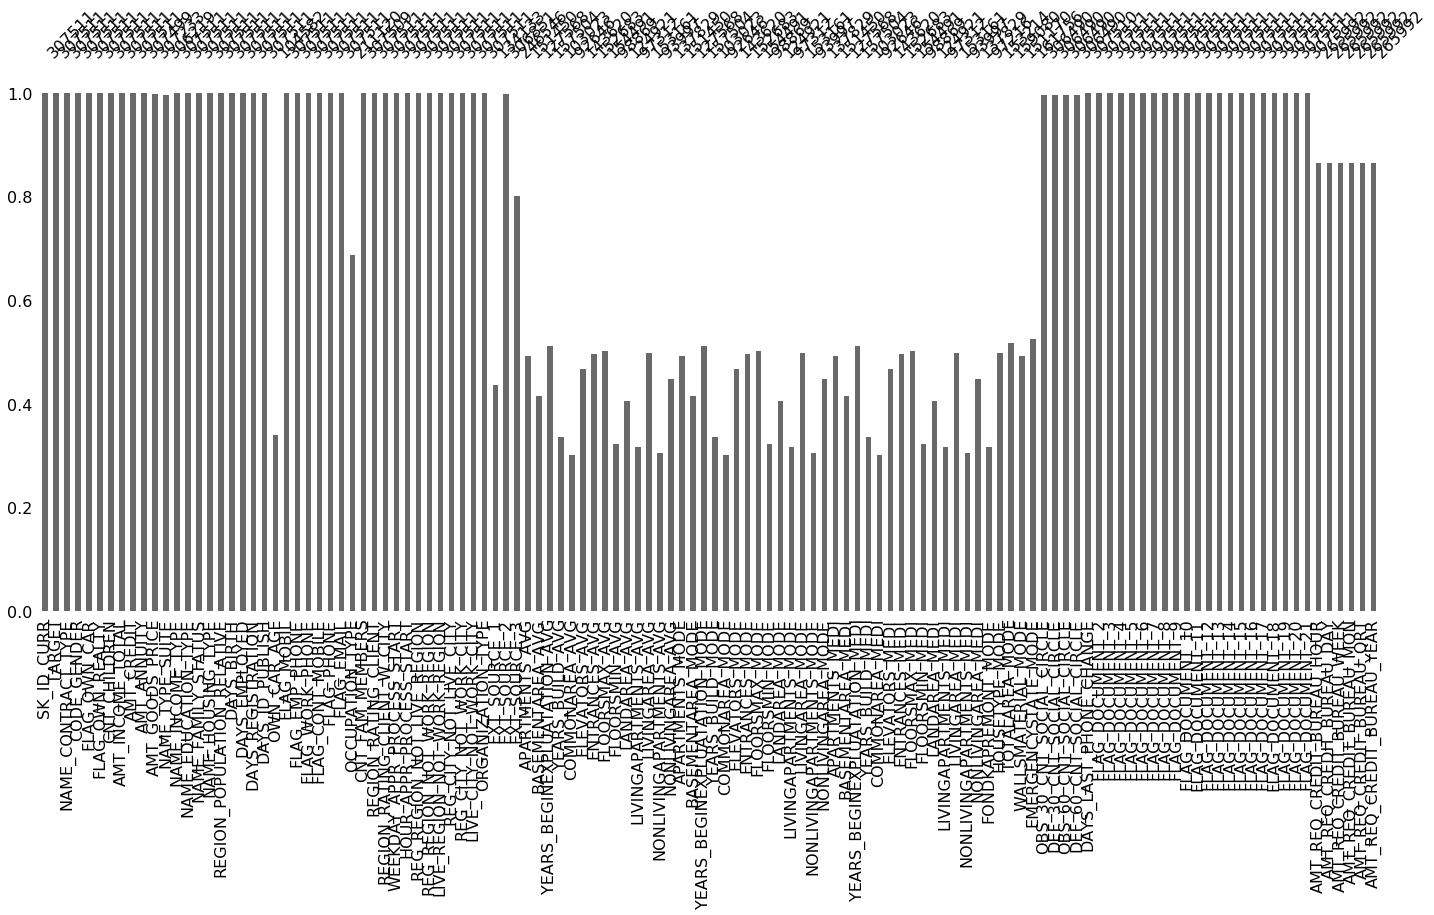

In [7]:
msno.bar(train)

plt.show()

### Test Dataset

In [8]:
# get the test dataset

test = pd.read_csv('"Home Credit Default Risk"_application_test.csv')

test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [9]:
# grasp the contents of the test dataset

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [10]:
test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [11]:
# check whether each feature value has missing values of the test dataset

test_n_missing_values = test.isnull().sum().drop("SK_ID_CURR")

test_n_missing_values_table = pd.DataFrame({
    'missing_values': test_n_missing_values
})

test_n_missing_values_table

,missing_values
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,24
AMT_GOODS_PRICE,0
NAME_TYPE_SUITE,911


### Concatenated Dataset

In [12]:
# concatenate the train dataset with the test dataset

train_test = train.append(test)

train_test

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,TARGET,TOTALAREA_MODE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
0,24700.5,406597.5,351000.0,202500.000,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0149,"Stone, brick",WEDNESDAY,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341
1,35698.5,1293502.5,1129500.0,270000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0714,Block,MONDAY,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040
2,6750.0,135000.0,135000.0,67500.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,MONDAY,NaN,NaN,NaN,NaN,NaN,NaN
3,29686.5,312682.5,297000.0,135000.000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,WEDNESDAY,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,513000.0,121500.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,THURSDAY,NaN,NaN,NaN,NaN,NaN,NaN
5,27517.5,490495.5,454500.0,99000.000,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,NaN,NaN,WEDNESDAY,NaN,NaN,NaN,NaN,NaN,NaN
6,41301.0,1560726.0,1395000.0,171000.000,0.0,0.0,1.0,1.0,0.0,2.0,...,0.0,NaN,NaN,SUNDAY,NaN,NaN,NaN,NaN,NaN,NaN
7,42075.0,1530000.0,1530000.0,360000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,MONDAY,NaN,NaN,NaN,NaN,NaN,NaN
8,33826.5,1019610.0,913500.0,112500.000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,NaN,NaN,WEDNESDAY,NaN,NaN,NaN,NaN,NaN,NaN
9,20250.0,405000.0,405000.0,135000.000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,THURSDAY,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# grasp the contents of the concatenated dataset

train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, AMT_ANNUITY to YEARS_BUILD_MODE
dtypes: float64(66), int64(40), object(16)
memory usage: 334.3+ MB


In [14]:
train_test.describe()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
count,356219.000000,3.562550e+05,3.559770e+05,3.562550e+05,308687.000000,308687.000000,308687.000000,308687.000000,308687.000000,308687.000000,...,356255.000000,356255.000000,307511.000000,185200.000000,183392.000000,183392.000000,183392.000000,119949.000000,119949.000000,119949.000000
mean,27425.560657,5.877674e+05,5.280200e+05,1.701161e+05,0.006281,0.005808,0.231697,0.304399,0.029995,1.911564,...,0.051371,278128.000000,0.080729,0.103193,0.977889,0.977903,0.977239,0.752283,0.755548,0.759452
std,14732.808190,3.986237e+05,3.660650e+05,2.235068e+05,0.104250,0.079736,0.855949,0.786915,0.191374,1.865338,...,0.220753,102842.104413,0.272419,0.108041,0.057929,0.058562,0.063165,0.113267,0.112057,0.110112
min,1615.500000,4.500000e+04,4.050000e+04,2.565000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16731.000000,2.700000e+05,2.340000e+05,1.125000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,189064.500000,0.000000,0.041500,0.976700,0.976700,0.976700,0.687200,0.691400,0.699400
50%,25078.500000,5.002110e+05,4.500000e+05,1.530000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,278128.000000,0.000000,0.069000,0.981600,0.981600,0.981600,0.755200,0.758500,0.764800
75%,34960.500000,7.975575e+05,6.750000e+05,2.025000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,367191.500000,0.000000,0.128700,0.986600,0.986600,0.986600,0.823200,0.825600,0.823600
max,258025.500000,4.050000e+06,4.050000e+06,1.170000e+08,9.000000,4.000000,27.000000,261.000000,8.000000,25.000000,...,1.000000,456255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# check whether each feature value has missing values of the concatenated dataset

train_test_n_missing_values = train_test.isnull().sum().drop("SK_ID_CURR")

train_test_n_missing_values_table = pd.DataFrame({
    'missing_values': train_test_n_missing_values
})

train_test_n_missing_values_table

,missing_values
AMT_ANNUITY,36
AMT_CREDIT,0
AMT_GOODS_PRICE,278
AMT_INCOME_TOTAL,0
AMT_REQ_CREDIT_BUREAU_DAY,47568
AMT_REQ_CREDIT_BUREAU_HOUR,47568
AMT_REQ_CREDIT_BUREAU_MON,47568
AMT_REQ_CREDIT_BUREAU_QRT,47568
AMT_REQ_CREDIT_BUREAU_WEEK,47568
AMT_REQ_CREDIT_BUREAU_YEAR,47568


In [16]:
# create dummies on all columns containing object elements

new_train_test = pd.get_dummies(train_test)

new_train_test

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,24700.5,406597.5,351000.0,202500.000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
1,35698.5,1293502.5,1129500.0,270000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,6750.0,135000.0,135000.0,67500.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,29686.5,312682.5,297000.0,135000.000,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,21865.5,513000.0,513000.0,121500.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
5,27517.5,490495.5,454500.0,99000.000,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
6,41301.0,1560726.0,1395000.0,171000.000,0.0,0.0,1.0,1.0,0.0,2.0,...,0,0,0,0,0,0,1,0,0,0
7,42075.0,1530000.0,1530000.0,360000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
8,33826.5,1019610.0,913500.0,112500.000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
9,20250.0,405000.0,405000.0,135000.000,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0


In [17]:
# check the "dummies"

new_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 246 entries, AMT_ANNUITY to WEEKDAY_APPR_PROCESS_START_WEDNESDAY
dtypes: float64(66), int64(40), uint8(140)
memory usage: 338.4 MB


In [18]:
#  compute all correlation coefficients of the new dataset containing dummies

corr_mat = new_train_test.corr()

corr_mat

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
AMT_ANNUITY,1.000000,0.762521,0.768123,0.204391,0.001472,0.003162,0.029877,0.017053,0.009583,-0.015458,...,0.054003,0.008384,-0.007634,-0.006866,-0.000356,-0.008688,-0.007038,0.007925,0.003761,0.006695
AMT_CREDIT,0.762521,1.000000,0.987159,0.166590,0.005411,-0.002333,0.058050,0.004341,0.002961,-0.047656,...,0.044889,0.009145,-0.007160,-0.003070,-0.002668,-0.005459,-0.000757,0.003073,-0.000309,0.007884
AMT_GOODS_PRICE,0.768123,0.987159,1.000000,0.169445,0.005816,-0.001688,0.059851,0.004691,0.003229,-0.050080,...,0.047780,0.012101,-0.008882,-0.003254,-0.003500,-0.005934,0.001762,0.003343,-0.000758,0.008002
AMT_INCOME_TOTAL,0.204391,0.166590,0.169445,1.000000,0.002743,0.000767,0.022736,0.006712,0.001447,0.011153,...,0.034717,0.016735,-0.003601,-0.000923,-0.000191,-0.003681,-0.000575,0.002058,0.002537,-0.000154
AMT_REQ_CREDIT_BUREAU_DAY,0.001472,0.005411,0.005816,0.002743,1.000000,0.227493,-0.003313,-0.005853,0.214474,-0.003224,...,0.003764,0.002999,0.003515,0.002316,-0.010464,-0.003710,0.000644,0.005669,0.001661,0.003421
AMT_REQ_CREDIT_BUREAU_HOUR,0.003162,-0.002333,-0.001688,0.000767,0.227493,1.000000,0.002163,-0.004997,0.005566,-0.003516,...,0.004437,0.000572,-0.000562,0.000370,-0.005567,0.010761,0.018080,0.002322,-0.006227,-0.010241
AMT_REQ_CREDIT_BUREAU_MON,0.029877,0.058050,0.059851,0.022736,-0.003313,0.002163,1.000000,-0.020014,-0.007699,-0.005750,...,0.036612,0.014461,-0.006131,-0.000091,0.004704,0.000446,0.005494,-0.003616,-0.005934,0.001482
AMT_REQ_CREDIT_BUREAU_QRT,0.017053,0.004341,0.004691,0.006712,-0.005853,-0.004997,-0.020014,1.000000,-0.020230,0.066747,...,-0.000130,0.001895,-0.001772,-0.002970,-0.000637,-0.005737,0.003972,0.005472,-0.000070,0.000658
AMT_REQ_CREDIT_BUREAU_WEEK,0.009583,0.002961,0.003229,0.001447,0.214474,0.005566,-0.007699,-0.020230,1.000000,0.016578,...,0.002064,0.001240,0.000647,0.005307,-0.001679,-0.002205,0.000562,0.000887,-0.004251,0.001350
AMT_REQ_CREDIT_BUREAU_YEAR,-0.015458,-0.047656,-0.050080,0.011153,-0.003224,-0.003516,-0.005750,0.066747,0.016578,1.000000,...,-0.005073,-0.000238,-0.000656,0.005923,0.001036,0.003191,0.007104,0.004161,-0.008519,-0.009079


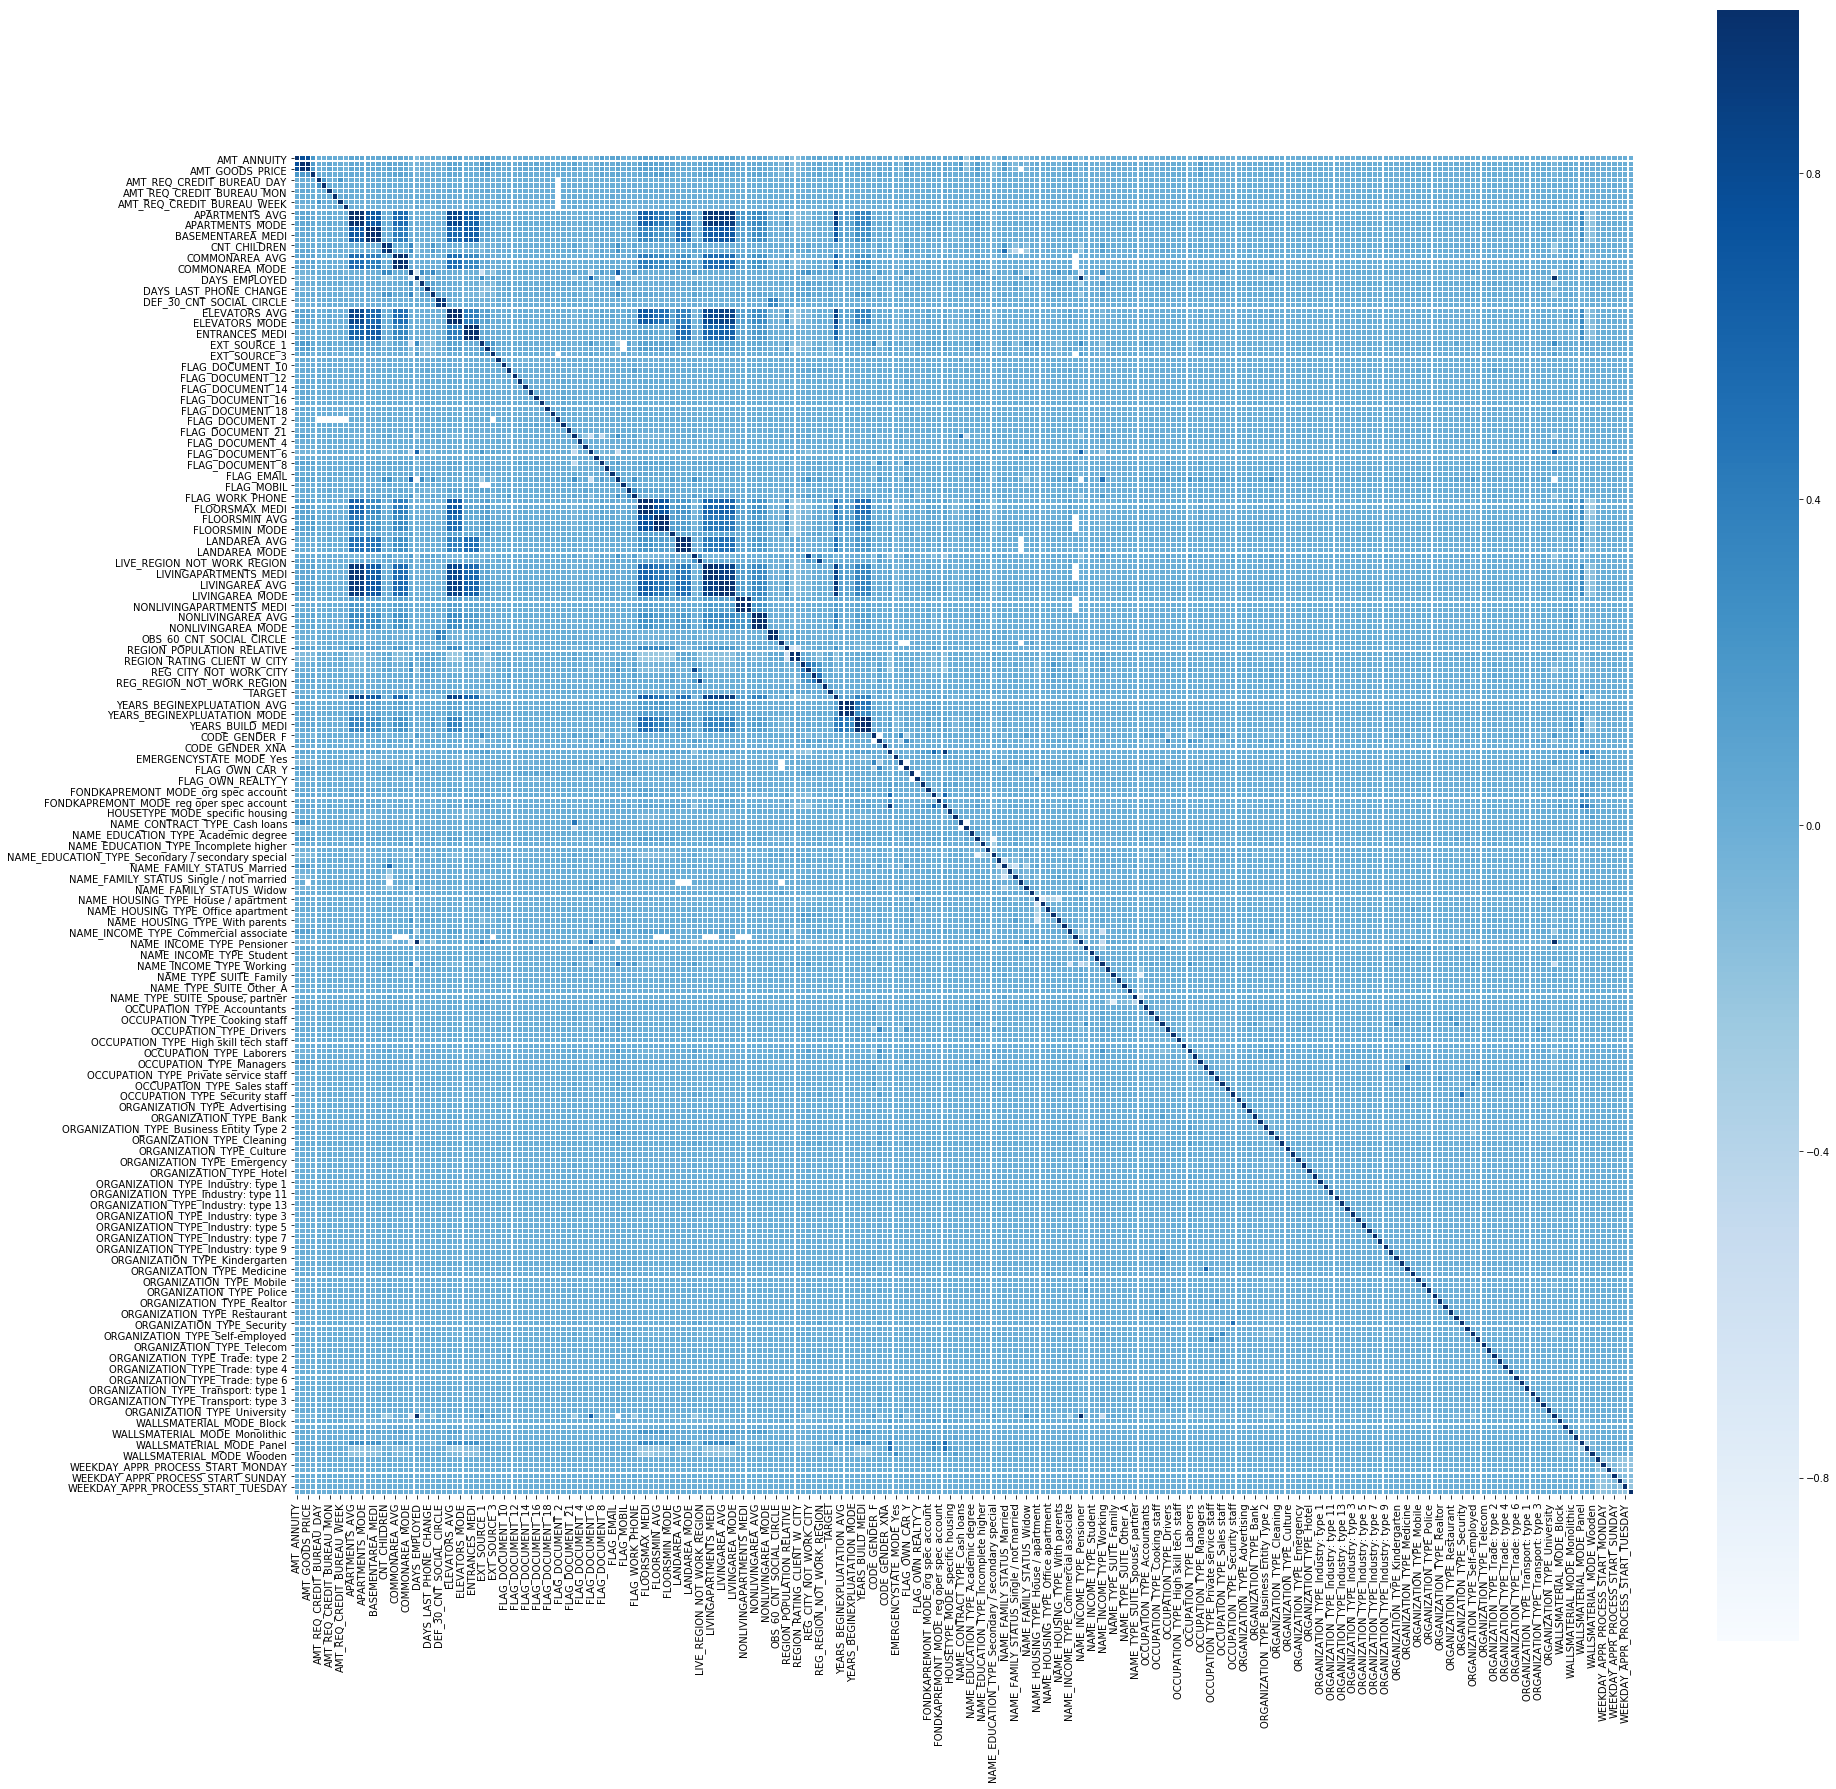

In [19]:
# create the heatmap

plt.figure(figsize=(30,30))
sns.heatmap(corr_mat, linewidth=0.1, square=True, cmap="Blues")

plt.show()

In [20]:
# split the concatenated dataset into the train dataset and the test dataset

train_input = new_train_test[0: train.shape[0]].copy()
print("train_inout shape is", train_input.shape)

test_input = new_train_test[train.shape[0]:].copy()
print("train_inout shape is", test_input.shape)

train_inout shape is (307511, 246)
train_inout shape is (48744, 246)


## [Task 1] Create a Pipeline

In [81]:
# pipeline

X = train_input.drop("TARGET",axis=1).values
y = train_input.loc[:,'TARGET'].values

X

array([[2.4700500e+04, 4.0659750e+05, 3.5100000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [3.5698500e+04, 1.2935025e+06, 1.1295000e+06, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.7500000e+03, 1.3500000e+05, 1.3500000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.9979000e+04, 6.7766400e+05, 5.8500000e+05, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0205000e+04, 3.7010700e+05, 3.1950000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [4.9117500e+04, 6.7500000e+05, 6.7500000e+05, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [23]:
y

array([1., 0., 0., ..., 0., 1., 0.])

In [24]:
# LightGBM

lgb_train = lgb.Dataset(X,y)

In [25]:
lgb_eval = lgb.Dataset(X, y, reference=lgb_train)

In [26]:
lgb_params = {'objective':'binary',
               'boosting_type': 'rf',
               'subsample': 0.623,
               'colsample_bytree': 0.7,
               'num_leaves': 127,
               'max_depth': 8,
               'seed': 99,
               'bagging_freq': 1,
               'n_jobs': 4}

In [27]:
model = lgb.train(lgb_params, lgb_train, valid_sets=lgb_eval)

[1]	valid_0's binary_logloss: 0.262326
[2]	valid_0's binary_logloss: 0.25312
[3]	valid_0's binary_logloss: 0.251118
[4]	valid_0's binary_logloss: 0.250335
[5]	valid_0's binary_logloss: 0.250268
[6]	valid_0's binary_logloss: 0.250072
[7]	valid_0's binary_logloss: 0.249893
[8]	valid_0's binary_logloss: 0.249758
[9]	valid_0's binary_logloss: 0.249673
[10]	valid_0's binary_logloss: 0.249562
[11]	valid_0's binary_logloss: 0.249642
[12]	valid_0's binary_logloss: 0.24955
[13]	valid_0's binary_logloss: 0.249641
[14]	valid_0's binary_logloss: 0.249725
[15]	valid_0's binary_logloss: 0.249621
[16]	valid_0's binary_logloss: 0.249718
[17]	valid_0's binary_logloss: 0.249586
[18]	valid_0's binary_logloss: 0.24948
[19]	valid_0's binary_logloss: 0.249417
[20]	valid_0's binary_logloss: 0.249535
[21]	valid_0's binary_logloss: 0.249576
[22]	valid_0's binary_logloss: 0.249498
[23]	valid_0's binary_logloss: 0.249422
[24]	valid_0's binary_logloss: 0.24936
[25]	valid_0's binary_logloss: 0.24932
[26]	valid_0's

In [61]:
# predict the train dataset

y_pred = model.predict(X, num_iteration=model.best_iteration)

y_pred

array([0.352796  , 0.04778548, 0.06785813, ..., 0.07383127, 0.06623574,
       0.0831377 ])

In [88]:
# sompute the AUC score

roc_auc_score(y, y_pred)

0.7570752634565502

In [62]:
# predict the test dataset

y_test_pred = model.predict(test_input.values, num_iteration=model.best_iteration)

In [87]:
# submittion the result

sub = pd.read_csv('"Home Credit Default Risk"_sample_submission.csv')

In [64]:
sub['TARGET'] = y_test_pred

In [67]:
sub.to_csv('"Home Credit Default Risk"_pipeline1.csv', index=False)

In [68]:
sub.head()

,SK_ID_CURR,TARGET
0,100001,0.064865
1,100005,0.089097
2,100013,0.037468
3,100028,0.051974
4,100038,0.111218


## [Task 2] Create a Definition of AUC

In [69]:
# def of AUC

## [Task 3] Preprocessing, Feature Enginnering and Fitting

In [70]:
# get top100 feature values correlated with "TARGET"

top100_correlations = corr_mat.nlargest(101, "TARGET")["TARGET"].drop("TARGET")

top100_correlations_table = pd.DataFrame({
    'correlation': top100_correlations
})

top100_correlations_table

,correlation
DAYS_BIRTH,0.078239
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
NAME_INCOME_TYPE_Working,0.057481
DAYS_LAST_PHONE_CHANGE,0.055218
CODE_GENDER_M,0.054713
DAYS_ID_PUBLISH,0.051457
REG_CITY_NOT_WORK_CITY,0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special,0.049824
FLAG_EMP_PHONE,0.045982


In [71]:
#  compute correlation coefficients of the 100 feature values

top100_corr_mat = corr_mat[top100_correlations.index].corr()

top100_corr_mat

,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_INCOME_TYPE_Working,DAYS_LAST_PHONE_CHANGE,CODE_GENDER_M,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,NAME_EDUCATION_TYPE_Secondary / secondary special,FLAG_EMP_PHONE,...,FLAG_DOCUMENT_20,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Legal Services,NAME_HOUSING_TYPE_Co-op apartment,FLAG_DOCUMENT_5,OCCUPATION_TYPE_Realty agents,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Telecom
DAYS_BIRTH,1.000000,0.030426,0.027909,0.668651,0.139769,0.404418,0.655498,0.555471,-0.238585,0.901927,...,0.022878,0.031632,0.053538,0.023805,0.061716,0.035571,0.045635,0.041215,0.014061,0.046445
REGION_RATING_CLIENT_W_CITY,0.030426,1.000000,0.997365,0.234353,0.142452,-0.055858,0.015908,0.179269,0.302165,-0.045139,...,0.015720,-0.038515,0.013943,-0.036929,0.000848,-0.057941,-0.015461,0.004248,0.013588,-0.005569
REGION_RATING_CLIENT,0.027909,0.997365,1.000000,0.234610,0.140271,-0.057415,0.012875,0.150140,0.292224,-0.047020,...,0.013930,-0.038173,0.012781,-0.037399,-0.000384,-0.058692,-0.014545,0.002812,0.011592,-0.005898
NAME_INCOME_TYPE_Working,0.668651,0.234353,0.234610,1.000000,0.055647,0.305263,0.468764,0.469120,0.093074,0.727000,...,0.016322,0.005126,0.082221,-0.011261,0.031276,0.012960,0.017111,0.097191,0.025528,0.029257
DAYS_LAST_PHONE_CHANGE,0.139769,0.142452,0.140271,0.055647,1.000000,0.060061,0.184189,0.142774,0.054421,-0.011266,...,0.017432,-0.007899,-0.000564,-0.015998,0.006847,-0.011909,-0.011398,-0.020877,-0.006365,-0.010855
CODE_GENDER_M,0.404418,-0.055858,-0.057415,0.305263,0.060061,1.000000,0.167930,0.349813,-0.046710,0.373910,...,0.013346,0.011978,0.048885,0.012704,0.027334,0.017911,-0.041372,0.061295,-0.007050,0.027312
DAYS_ID_PUBLISH,0.655498,0.015908,0.012875,0.468764,0.184189,0.167930,1.000000,0.389294,-0.134618,0.640758,...,0.009465,0.023336,0.038310,0.012968,0.035142,0.022426,0.036999,0.035981,0.008294,0.028097
REG_CITY_NOT_WORK_CITY,0.555471,0.179269,0.150140,0.469120,0.142774,0.349813,0.389294,1.000000,0.062326,0.521472,...,0.012371,-0.003386,0.017087,-0.010780,0.030444,0.024118,-0.008069,0.026359,0.016346,0.011369
NAME_EDUCATION_TYPE_Secondary / secondary special,-0.238585,0.302165,0.292224,0.093074,0.054421,-0.046710,-0.134618,0.062326,1.000000,-0.222301,...,-0.008986,-0.057266,0.025406,-0.102429,-0.040907,-0.035536,-0.028765,0.029111,0.017171,-0.044588
FLAG_EMP_PHONE,0.901927,-0.045139,-0.047020,0.727000,-0.011266,0.373910,0.640758,0.521472,-0.222301,1.000000,...,0.023607,0.034966,0.065926,0.030459,0.038833,0.032301,0.045212,0.090569,0.014762,0.046973


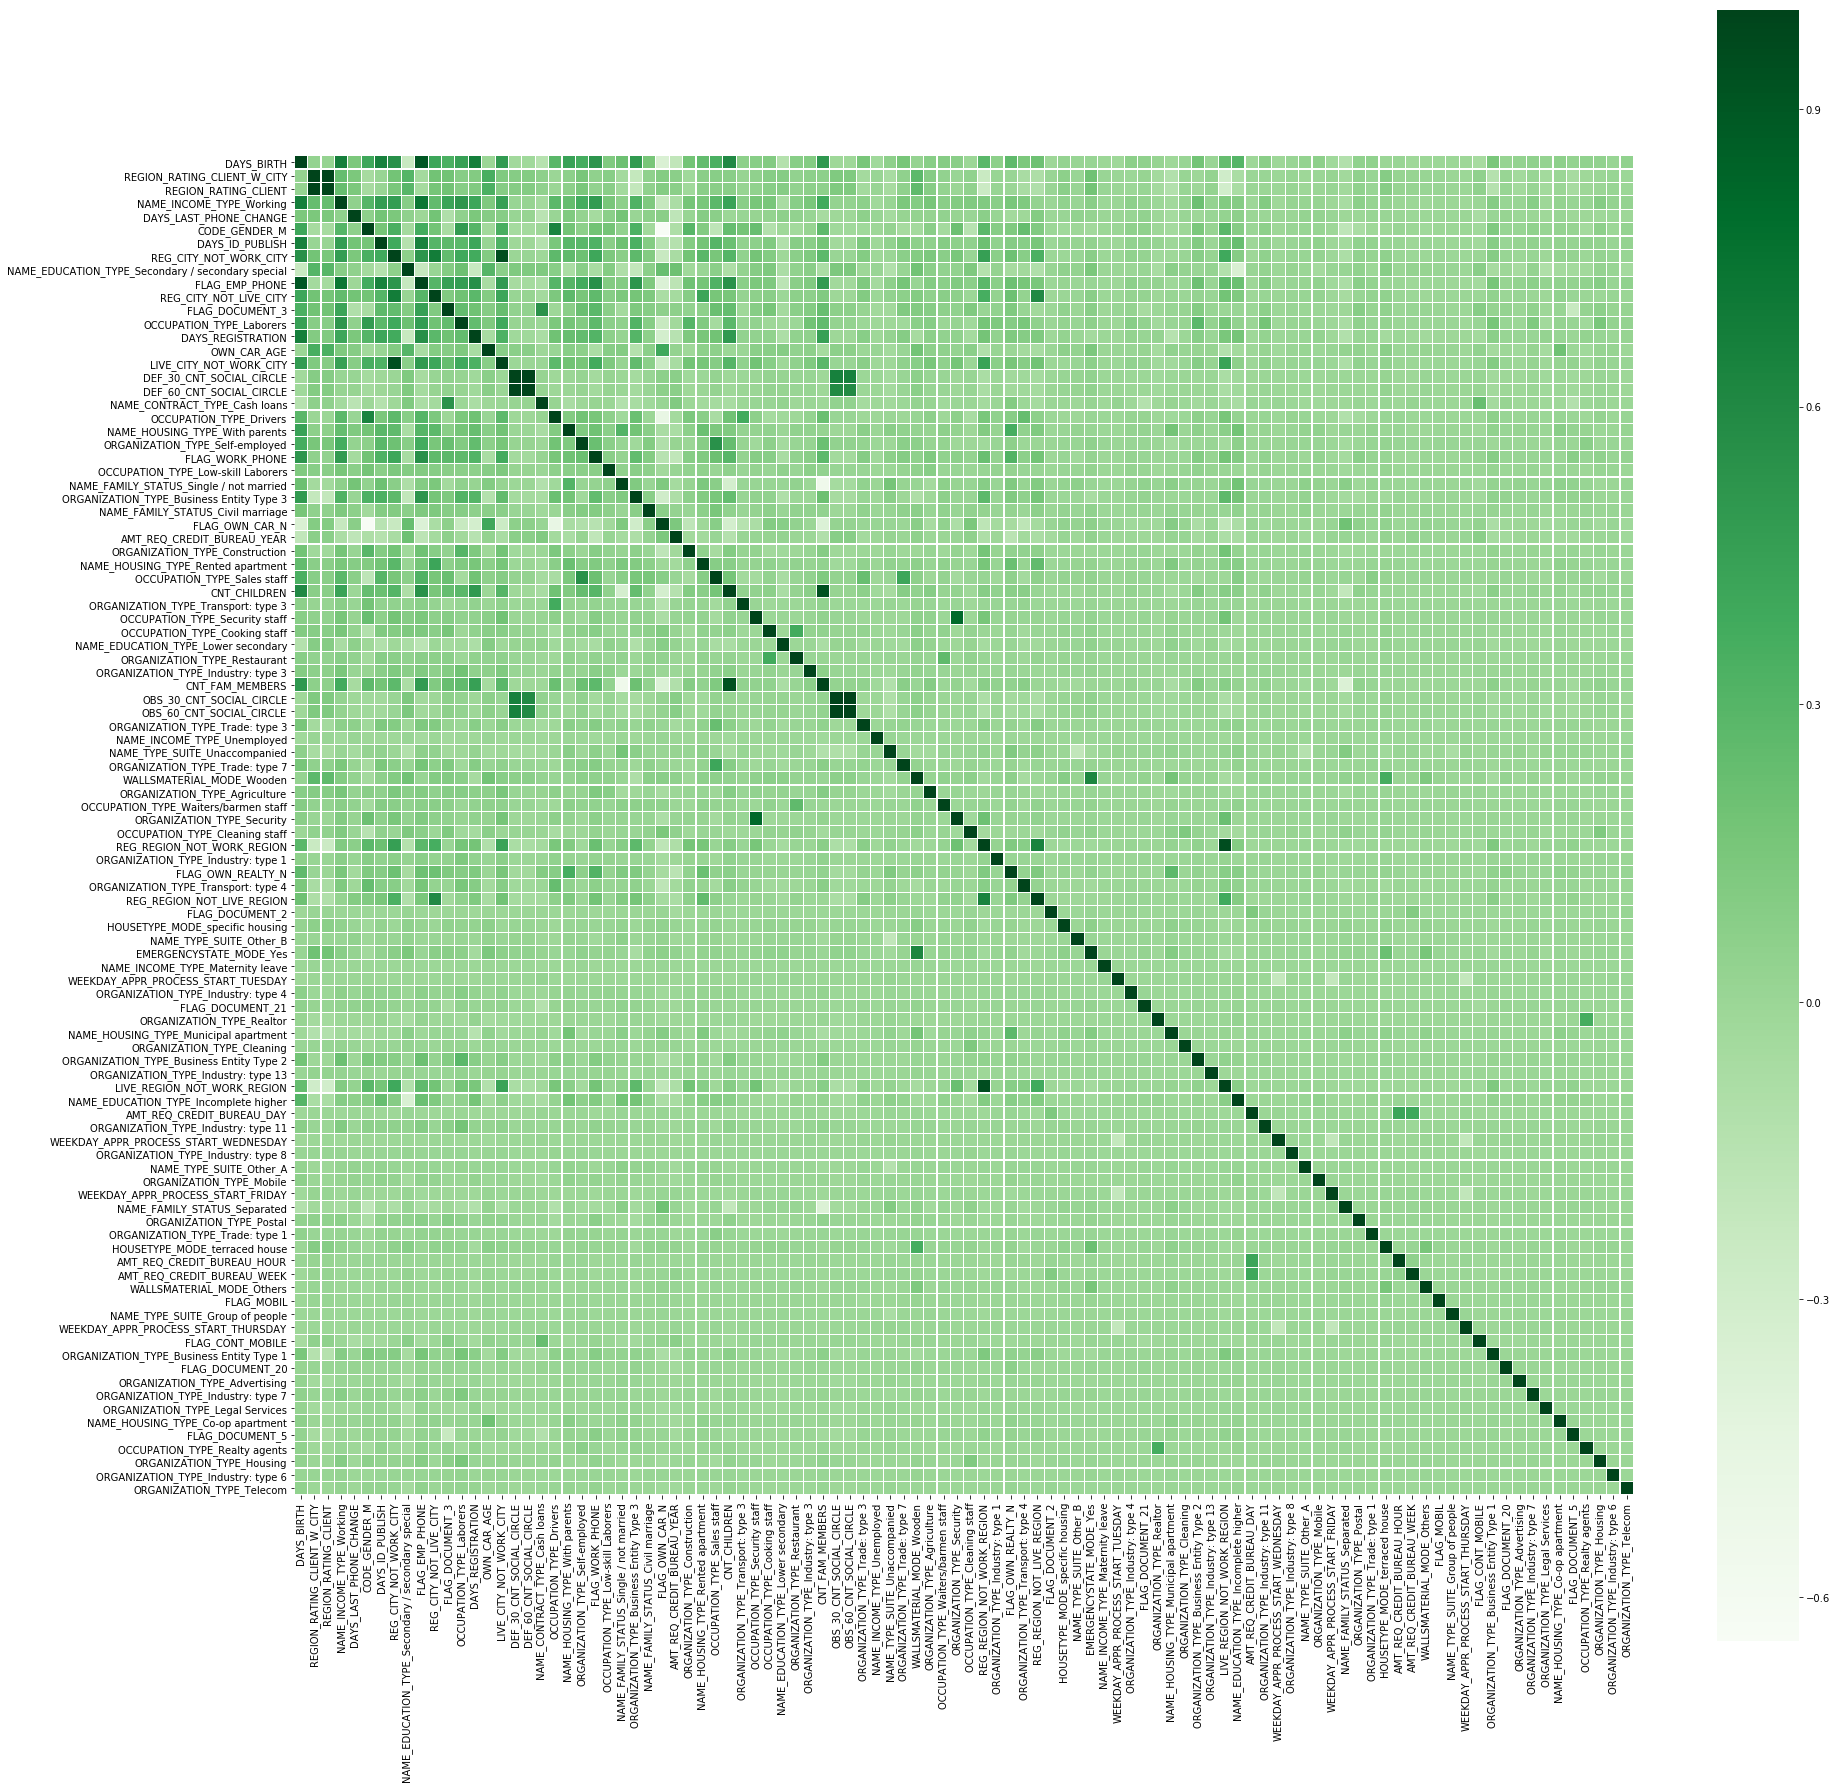

In [39]:
# create the heatmap of the 100 feature values

plt.figure(figsize=(30,30))
sns.heatmap(top100_corr_mat, linewidth=0.1, square=True, cmap="Greens")

plt.show()

In [72]:
# create a list of the 100 feature values

top100_list = list(top100_correlations.index)

top100_list

['DAYS_BIRTH',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'NAME_INCOME_TYPE_Working',
 'DAYS_LAST_PHONE_CHANGE',
 'CODE_GENDER_M',
 'DAYS_ID_PUBLISH',
 'REG_CITY_NOT_WORK_CITY',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'FLAG_EMP_PHONE',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_DOCUMENT_3',
 'OCCUPATION_TYPE_Laborers',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'LIVE_CITY_NOT_WORK_CITY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_CONTRACT_TYPE_Cash loans',
 'OCCUPATION_TYPE_Drivers',
 'NAME_HOUSING_TYPE_With parents',
 'ORGANIZATION_TYPE_Self-employed',
 'FLAG_WORK_PHONE',
 'OCCUPATION_TYPE_Low-skill Laborers',
 'NAME_FAMILY_STATUS_Single / not married',
 'ORGANIZATION_TYPE_Business Entity Type 3',
 'NAME_FAMILY_STATUS_Civil marriage',
 'FLAG_OWN_CAR_N',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'ORGANIZATION_TYPE_Construction',
 'NAME_HOUSING_TYPE_Rented apartment',
 'OCCUPATION_TYPE_Sales staff',
 'CNT_CHILDREN',
 'ORGANIZATION_TYPE_Transport: type 3',
 '

In [151]:
# compute how many percentages each feature value includes missing values

total_of_top100 = new_train_test[top100_list].isnull().sum()
missing_ratio_of_top100 = total_of_top100 / len(new_train_test[top100_list])

missing_ratio_table_of_top100 = pd.DataFrame({
    'Total': total_of_top100,
    'missing_ratio': missing_ratio_of_top100
})

missing_ratio_table_of_top100

,Total,missing_ratio
DAYS_BIRTH,0,0.000000
REGION_RATING_CLIENT_W_CITY,0,0.000000
REGION_RATING_CLIENT,0,0.000000
NAME_INCOME_TYPE_Working,0,0.000000
DAYS_LAST_PHONE_CHANGE,1,0.000003
CODE_GENDER_M,0,0.000000
DAYS_ID_PUBLISH,0,0.000000
REG_CITY_NOT_WORK_CITY,0,0.000000
NAME_EDUCATION_TYPE_Secondary / secondary special,0,0.000000
FLAG_EMP_PHONE,0,0.000000


In [152]:
# get 10 feature values whose missing ratio is within top 100

top10_missing_ratio = missing_ratio_table_of_top100.nlargest(11, "missing_ratio")["missing_ratio"]

top10_missing_ratio_table = pd.DataFrame({
    'missing_ratio': top10_missing_ratio
})

top10_missing_ratio_table

,missing_ratio
OWN_CAR_AGE,0.660316
AMT_REQ_CREDIT_BUREAU_YEAR,0.133522
AMT_REQ_CREDIT_BUREAU_DAY,0.133522
AMT_REQ_CREDIT_BUREAU_HOUR,0.133522
AMT_REQ_CREDIT_BUREAU_WEEK,0.133522
DEF_30_CNT_SOCIAL_CIRCLE,0.002947
DEF_60_CNT_SOCIAL_CIRCLE,0.002947
OBS_30_CNT_SOCIAL_CIRCLE,0.002947
OBS_60_CNT_SOCIAL_CIRCLE,0.002947
CNT_FAM_MEMBERS,0.000006


In [100]:
# check the "OWN_CAR_AGE" column

new_train_test["OWN_CAR_AGE"]

0         NaN
1         NaN
2        26.0
3         NaN
4         NaN
5         NaN
6        17.0
7         8.0
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13       23.0
14        NaN
15       17.0
16        NaN
17        NaN
18        NaN
19        NaN
20        7.0
21       14.0
22        NaN
23        NaN
24        7.0
25        NaN
26        NaN
27        NaN
28        1.0
29        NaN
         ... 
48714     NaN
48715     6.0
48716     NaN
48717     NaN
48718     NaN
48719     NaN
48720    12.0
48721     NaN
48722     NaN
48723     NaN
48724     NaN
48725     NaN
48726     NaN
48727     NaN
48728     NaN
48729     NaN
48730    11.0
48731    14.0
48732     NaN
48733     NaN
48734     NaN
48735     NaN
48736    12.0
48737     NaN
48738    65.0
48739     NaN
48740     NaN
48741     4.0
48742     NaN
48743    22.0
Name: OWN_CAR_AGE, Length: 356255, dtype: float64

In [101]:
new_train_test["OWN_CAR_AGE"].describe()

count    121014.000000
mean         12.023741
std          11.880848
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

In [109]:
# handle the missing values of the "OWN_CAR_AGE" column
# change the missing values of the "AMT_REQ_CREDIT_BUREAU_YEAR" column to 0s

edit_OWN_CAR_AGE = {"OWN_CAR_AGE":0}

edit1_train_test = new_train_test.fillna(value=edit_OWN_CAR_AGE)

edit1_train_test

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,24700.5,406597.5,351000.0,202500.000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
1,35698.5,1293502.5,1129500.0,270000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,6750.0,135000.0,135000.0,67500.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,29686.5,312682.5,297000.0,135000.000,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,21865.5,513000.0,513000.0,121500.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
5,27517.5,490495.5,454500.0,99000.000,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
6,41301.0,1560726.0,1395000.0,171000.000,0.0,0.0,1.0,1.0,0.0,2.0,...,0,0,0,0,0,0,1,0,0,0
7,42075.0,1530000.0,1530000.0,360000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
8,33826.5,1019610.0,913500.0,112500.000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
9,20250.0,405000.0,405000.0,135000.000,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0


In [77]:
# split the editted dataset into the train dataset and the test dataset

train_input2 = edit1_train_test[0: train.shape[0]].copy()
print("train_inout shape is", train_input2.shape)

test_input2 = edit1_train_test[train.shape[0]:].copy()
print("train_inout shape is", test_input2.shape)

train_inout shape is (307511, 246)
train_inout shape is (48744, 246)


In [80]:
# pipeline

X2 = train_input2.drop("TARGET",axis=1).values
y2 = train_input2.loc[:,'TARGET'].values

X2

array([[2.4700500e+04, 4.0659750e+05, 3.5100000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [3.5698500e+04, 1.2935025e+06, 1.1295000e+06, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.7500000e+03, 1.3500000e+05, 1.3500000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.9979000e+04, 6.7766400e+05, 5.8500000e+05, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0205000e+04, 3.7010700e+05, 3.1950000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [4.9117500e+04, 6.7500000e+05, 6.7500000e+05, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [79]:
y2

array([1., 0., 0., ..., 0., 1., 0.])

In [89]:
# LightGBM

lgb_train2 = lgb.Dataset(X2,y2)

In [83]:
lgb_eval2 = lgb.Dataset(X2, y2, reference=lgb_train2)

In [84]:
model2 = lgb.train(lgb_params, lgb_train2, valid_sets=lgb_eval2)

[1]	valid_0's binary_logloss: 0.262437
[2]	valid_0's binary_logloss: 0.25325
[3]	valid_0's binary_logloss: 0.251275
[4]	valid_0's binary_logloss: 0.250479
[5]	valid_0's binary_logloss: 0.250389
[6]	valid_0's binary_logloss: 0.250177
[7]	valid_0's binary_logloss: 0.249988
[8]	valid_0's binary_logloss: 0.249844
[9]	valid_0's binary_logloss: 0.249748
[10]	valid_0's binary_logloss: 0.249628
[11]	valid_0's binary_logloss: 0.249702
[12]	valid_0's binary_logloss: 0.249608
[13]	valid_0's binary_logloss: 0.249704
[14]	valid_0's binary_logloss: 0.249792
[15]	valid_0's binary_logloss: 0.249686
[16]	valid_0's binary_logloss: 0.24978
[17]	valid_0's binary_logloss: 0.249646
[18]	valid_0's binary_logloss: 0.249544
[19]	valid_0's binary_logloss: 0.249473
[20]	valid_0's binary_logloss: 0.24959
[21]	valid_0's binary_logloss: 0.249627
[22]	valid_0's binary_logloss: 0.24955
[23]	valid_0's binary_logloss: 0.249479
[24]	valid_0's binary_logloss: 0.249423
[25]	valid_0's binary_logloss: 0.249383
[26]	valid_0'

In [90]:
# predict the train dataset

y_pred2 = model2.predict(X2)

In [91]:
# compute the AUC score

roc_auc_score(y2, y_pred2)

0.756716663318338

In [99]:
# check the "AMT_REQ_CREDIT_BUREAU_YEAR" column

new_train_test["AMT_REQ_CREDIT_BUREAU_YEAR"]

0        1.0
1        0.0
2        0.0
3        NaN
4        0.0
5        1.0
6        2.0
7        0.0
8        1.0
9        NaN
10       0.0
11       2.0
12       0.0
13       1.0
14       NaN
15       1.0
16       0.0
17       NaN
18       0.0
19       2.0
20       NaN
21       4.0
22       5.0
23       3.0
24       0.0
25       0.0
26       2.0
27       0.0
28       1.0
29       NaN
        ... 
48714    1.0
48715    2.0
48716    NaN
48717    3.0
48718    0.0
48719    0.0
48720    0.0
48721    0.0
48722    3.0
48723    0.0
48724    0.0
48725    2.0
48726    3.0
48727    0.0
48728    3.0
48729    NaN
48730    0.0
48731    2.0
48732    3.0
48733    0.0
48734    3.0
48735    NaN
48736    2.0
48737    3.0
48738    2.0
48739    1.0
48740    NaN
48741    1.0
48742    2.0
48743    4.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, Length: 356255, dtype: float64

In [102]:
new_train_test["AMT_REQ_CREDIT_BUREAU_YEAR"].describe()

count    308687.000000
mean          1.911564
std           1.865338
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [131]:
# handle the missing values of the "AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_MON", 
# "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR" and "AMT_REQ_CREDIT_BUREAU_WEEK" columns additionally
# change the missing values of the 6 column to 0s

edit_missing_values = {"OWN_CAR_AGE":0,"AMT_REQ_CREDIT_BUREAU_YEAR":0,"AMT_REQ_CREDIT_BUREAU_QRT":0,"AMT_REQ_CREDIT_BUREAU_MON":0,
                       "AMT_REQ_CREDIT_BUREAU_DAY":0,"AMT_REQ_CREDIT_BUREAU_HOUR":0,"AMT_REQ_CREDIT_BUREAU_WEEK":0}
edit2_train_test = new_train_test.fillna(value=edit_missing_values)

edit2_train_test

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,24700.5,406597.5,351000.0,202500.000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
1,35698.5,1293502.5,1129500.0,270000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,6750.0,135000.0,135000.0,67500.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,29686.5,312682.5,297000.0,135000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,21865.5,513000.0,513000.0,121500.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
5,27517.5,490495.5,454500.0,99000.000,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
6,41301.0,1560726.0,1395000.0,171000.000,0.0,0.0,1.0,1.0,0.0,2.0,...,0,0,0,0,0,0,1,0,0,0
7,42075.0,1530000.0,1530000.0,360000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
8,33826.5,1019610.0,913500.0,112500.000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
9,20250.0,405000.0,405000.0,135000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [137]:
# split the editted dataset into the train dataset and the test dataset

train_input3 = edit2_train_test[0: train.shape[0]].copy()
print("train_inout shape is", train_input3.shape)

test_input3 = edit2_train_test[train.shape[0]:].copy()
print("train_inout shape is", test_input3.shape)

train_inout shape is (307511, 246)
train_inout shape is (48744, 246)


In [138]:
# pipeline

X3 = train_input3.drop("TARGET",axis=1).values
y3 = train_input3.loc[:,'TARGET'].values

X3

array([[2.4700500e+04, 4.0659750e+05, 3.5100000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [3.5698500e+04, 1.2935025e+06, 1.1295000e+06, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.7500000e+03, 1.3500000e+05, 1.3500000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.9979000e+04, 6.7766400e+05, 5.8500000e+05, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0205000e+04, 3.7010700e+05, 3.1950000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [4.9117500e+04, 6.7500000e+05, 6.7500000e+05, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [139]:
y3

array([1., 0., 0., ..., 0., 1., 0.])

In [140]:
# LightGBM

lgb_train3 = lgb.Dataset(X3,y3)

lgb_eval3 = lgb.Dataset(X3, y3, reference=lgb_train3)

model3 = lgb.train(lgb_params, lgb_train3, valid_sets=lgb_eval3)

[1]	valid_0's binary_logloss: 0.262399
[2]	valid_0's binary_logloss: 0.25324
[3]	valid_0's binary_logloss: 0.251286
[4]	valid_0's binary_logloss: 0.250487
[5]	valid_0's binary_logloss: 0.250402
[6]	valid_0's binary_logloss: 0.250189
[7]	valid_0's binary_logloss: 0.249998
[8]	valid_0's binary_logloss: 0.249854
[9]	valid_0's binary_logloss: 0.249781
[10]	valid_0's binary_logloss: 0.249654
[11]	valid_0's binary_logloss: 0.249727
[12]	valid_0's binary_logloss: 0.24963
[13]	valid_0's binary_logloss: 0.249725
[14]	valid_0's binary_logloss: 0.249812
[15]	valid_0's binary_logloss: 0.249705
[16]	valid_0's binary_logloss: 0.249802
[17]	valid_0's binary_logloss: 0.249667
[18]	valid_0's binary_logloss: 0.249564
[19]	valid_0's binary_logloss: 0.249493
[20]	valid_0's binary_logloss: 0.249607
[21]	valid_0's binary_logloss: 0.249644
[22]	valid_0's binary_logloss: 0.249565
[23]	valid_0's binary_logloss: 0.249496
[24]	valid_0's binary_logloss: 0.249439
[25]	valid_0's binary_logloss: 0.249399
[26]	valid_

In [141]:
# predict the train dataset

y_pred3 = model3.predict(X3)

In [142]:
# compute the AUC score

roc_auc_score(y3, y_pred3)

0.7566818900026925

In [143]:
# predict the test dataset

y_test_pred2 = model2.predict(test_input2.values)

In [144]:
# submittion the result

sub2 = pd.read_csv('"Home Credit Default Risk"_sample_submission.csv')

In [145]:
sub2['TARGET'] = y_test_pred2

In [146]:
sub2.to_csv('"Home Credit Default Risk"_pipeline2.csv', index=False)

In [147]:
sub2.head()

,SK_ID_CURR,TARGET
0,100001,0.063302
1,100005,0.088821
2,100013,0.039223
3,100028,0.050966
4,100038,0.113571


In [153]:
# compute how many percentages each feature value includes missing values

total = new_train_test.isnull().sum()
missing_ratio = total / len(new_train_test)

missing_ratio_table = pd.DataFrame({
    'Total': total,
    'missing_ratio': missing_ratio
})

missing_ratio_table

,Total,missing_ratio
AMT_ANNUITY,36,0.000101
AMT_CREDIT,0,0.000000
AMT_GOODS_PRICE,278,0.000780
AMT_INCOME_TOTAL,0,0.000000
AMT_REQ_CREDIT_BUREAU_DAY,47568,0.133522
AMT_REQ_CREDIT_BUREAU_HOUR,47568,0.133522
AMT_REQ_CREDIT_BUREAU_MON,47568,0.133522
AMT_REQ_CREDIT_BUREAU_QRT,47568,0.133522
AMT_REQ_CREDIT_BUREAU_WEEK,47568,0.133522
AMT_REQ_CREDIT_BUREAU_YEAR,47568,0.133522


In [154]:
# get 100 feature values whose missing ratio is within top 100

top100_missing_ratio = missing_ratio_table.nlargest(101, "missing_ratio")["missing_ratio"]

top100_missing_ratio_table = pd.DataFrame({
    'missing_ratio': top100_missing_ratio
})

top100_missing_ratio_table

,missing_ratio
COMMONAREA_AVG,0.697141
COMMONAREA_MEDI,0.697141
COMMONAREA_MODE,0.697141
NONLIVINGAPARTMENTS_AVG,0.692933
NONLIVINGAPARTMENTS_MEDI,0.692933
NONLIVINGAPARTMENTS_MODE,0.692933
LIVINGAPARTMENTS_AVG,0.682037
LIVINGAPARTMENTS_MEDI,0.682037
LIVINGAPARTMENTS_MODE,0.682037
FLOORSMIN_AVG,0.676785


In [155]:
# create a list of the 100 feature values

top100_missing_ratio_list = list(top100_missing_ratio_table.index)

top100_missing_ratio_list

['COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE',
 'EXT_SOURCE_1',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE',
 'TOTALAREA_MODE',
 'EXT_SOURCE_3',
 'TARGET',
 'AMT_REQ_

In [156]:
#  compute correlation coefficients of the 100 feature values

top100_missing_ratio_corr_mat = corr_mat[top100_missing_ratio_list].corr()

top100_missing_ratio_corr_mat

,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,FLOORSMIN_AVG,...,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_PHONE,FLAG_WORK_PHONE,HOUR_APPR_PROCESS_START,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
COMMONAREA_AVG,1.000000,0.999986,0.999327,0.357139,0.356103,0.351823,0.909647,0.909722,0.908818,0.744972,...,-0.018293,-0.034326,0.226903,-0.070602,0.281112,-0.200043,0.068379,0.541266,-0.423840,-0.454181
COMMONAREA_MEDI,0.999986,1.000000,0.999468,0.357409,0.356396,0.352171,0.910019,0.910117,0.909309,0.743610,...,-0.017789,-0.034369,0.225928,-0.070280,0.279422,-0.199495,0.067798,0.538424,-0.421044,-0.451458
COMMONAREA_MODE,0.999327,0.999468,1.000000,0.357178,0.356310,0.352587,0.909365,0.909585,0.909591,0.731252,...,-0.017977,-0.034503,0.219658,-0.069501,0.269124,-0.197395,0.063241,0.520019,-0.403423,-0.434218
NONLIVINGAPARTMENTS_AVG,0.357139,0.357409,0.357178,1.000000,0.999928,0.999406,0.382453,0.381955,0.376664,0.298448,...,-0.020191,-0.018988,0.054804,-0.047397,0.109719,-0.073918,0.014910,0.192582,-0.154534,-0.165940
NONLIVINGAPARTMENTS_MEDI,0.356103,0.356396,0.356310,0.999928,1.000000,0.999647,0.381292,0.380826,0.375654,0.295334,...,-0.020152,-0.018947,0.054036,-0.046786,0.108087,-0.072839,0.014827,0.189854,-0.151854,-0.163241
NONLIVINGAPARTMENTS_MODE,0.351823,0.352171,0.352587,0.999406,0.999647,1.000000,0.375745,0.375347,0.370639,0.286206,...,-0.020326,-0.018809,0.050955,-0.045757,0.102709,-0.070269,0.013130,0.180722,-0.143281,-0.154593
LIVINGAPARTMENTS_AVG,0.909647,0.910019,0.909365,0.382453,0.381292,0.375745,1.000000,0.999984,0.999491,0.797643,...,-0.022295,-0.037027,0.238996,-0.087148,0.303816,-0.235369,0.050769,0.557772,-0.436906,-0.471827
LIVINGAPARTMENTS_MEDI,0.909722,0.910117,0.909585,0.381955,0.380826,0.375347,0.999984,1.000000,0.999615,0.796402,...,-0.022300,-0.037053,0.238319,-0.086848,0.302238,-0.234882,0.050223,0.555095,-0.434219,-0.469172
LIVINGAPARTMENTS_MODE,0.908818,0.909309,0.909591,0.376664,0.375654,0.370639,0.999491,0.999615,1.000000,0.788388,...,-0.022922,-0.037192,0.234369,-0.086104,0.294675,-0.233337,0.046929,0.541905,-0.421100,-0.456326
FLOORSMIN_AVG,0.744972,0.743610,0.731252,0.298448,0.295334,0.286206,0.797643,0.796402,0.788388,1.000000,...,-0.011736,-0.028754,0.255651,-0.089661,0.381797,-0.225286,0.114260,0.685836,-0.555457,-0.580474


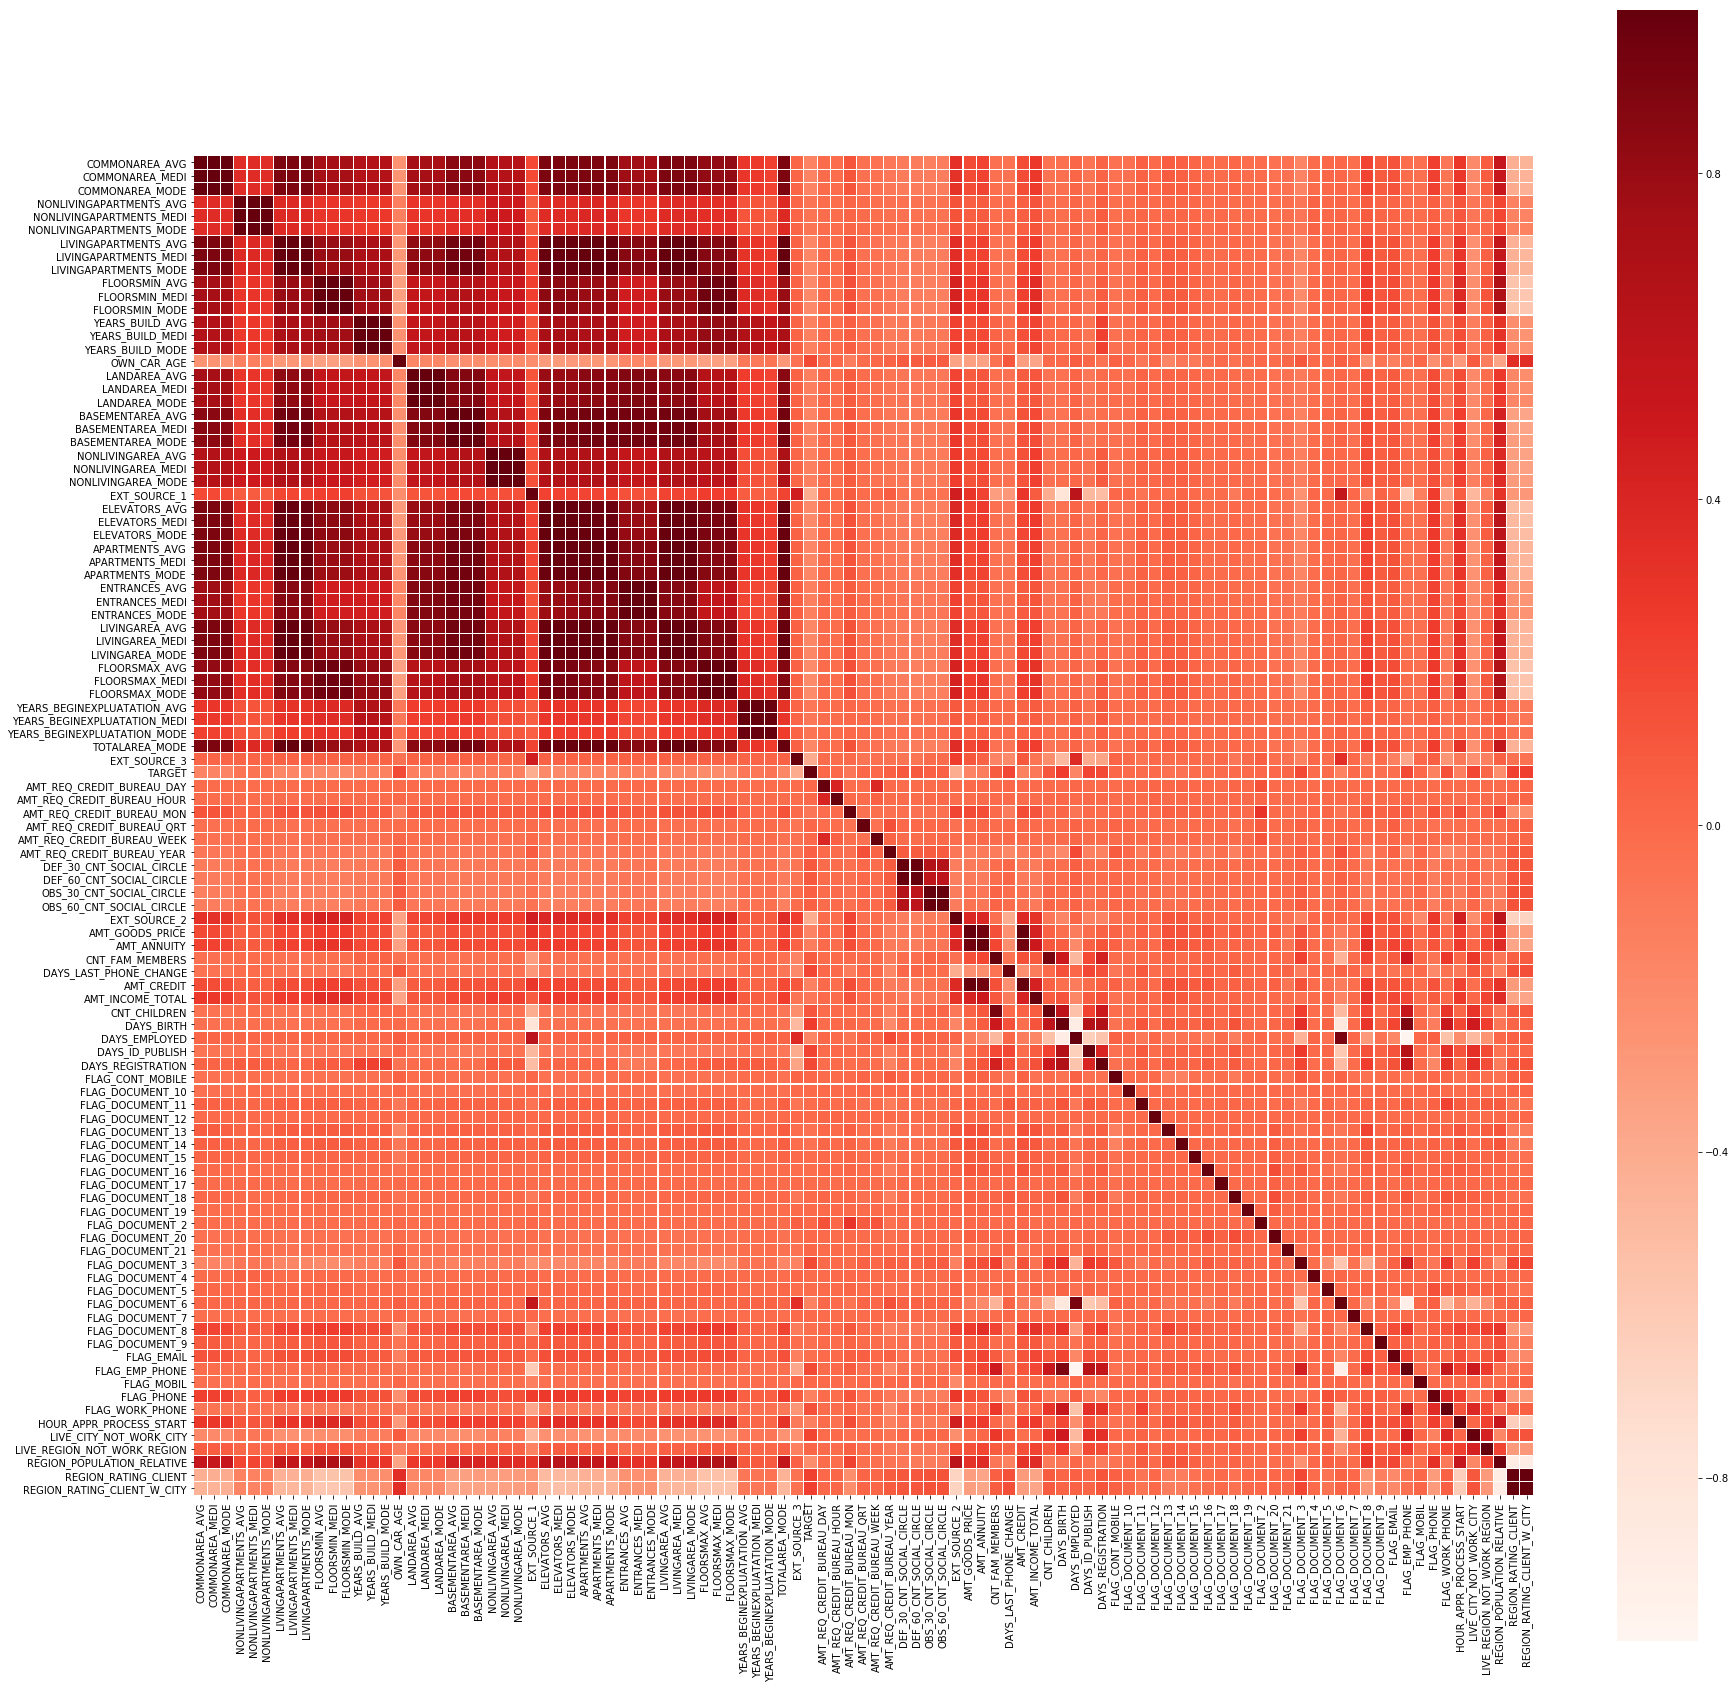

In [157]:
# create the heatmap of the 100 feature values

plt.figure(figsize=(30,30))
sns.heatmap(top100_missing_ratio_corr_mat, linewidth=0.1, square=True, cmap="Reds")

plt.show()